In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = pd.read_csv("../../datasets/titanic3.csv")
df.drop(labels=['ticket','body','home.dest','cabin','boat','embarked','name'], axis=1, inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


### exploratory data analitics (EDA)

##### target

In [10]:
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

#### numeric vs target

<Figure size 600x600 with 0 Axes>

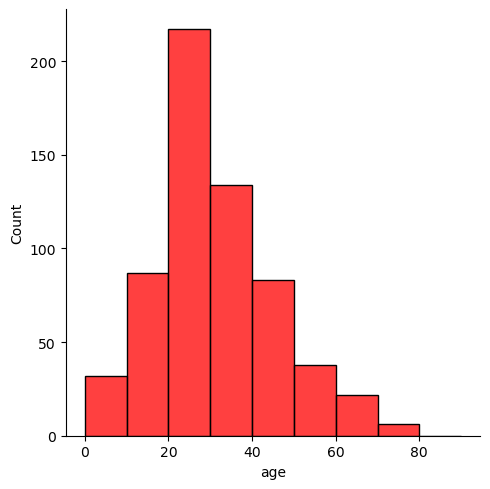

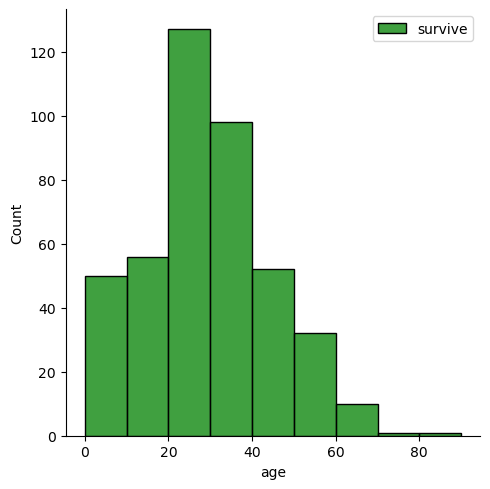

In [12]:
plt.figure(figsize=(6,6))
sns.displot(df.age[df.survived == 0], bins=[0,10,20,30,40,50,60,70,80,90], color='r', label='not survive')
sns.displot(df.age[df.survived == 1], bins=[0,10,20,30,40,50,60,70,80,90], color='g', label='survive')
plt.legend()

<Figure size 600x600 with 0 Axes>

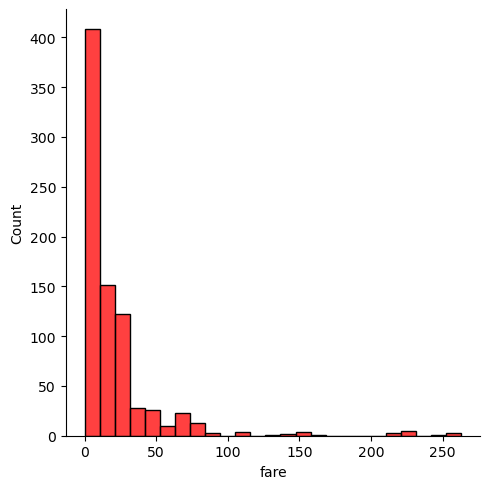

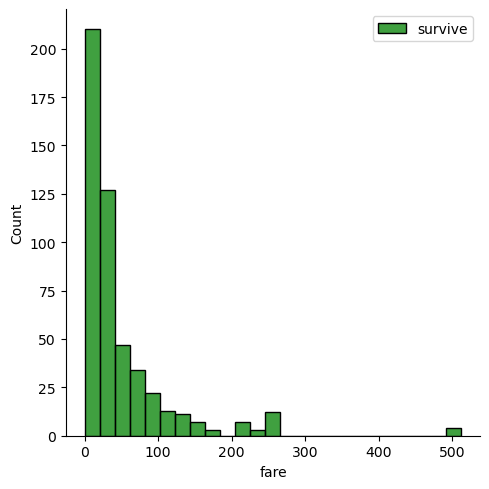

In [14]:
plt.figure(figsize=(6,6))
sns.displot(df.fare[df.survived == 0], bins=25, color='r', label='not survive')
sns.displot(df.fare[df.survived == 1], bins=25, color='g', label='survive')
plt.legend()

#### category vs target

C:\Users\arwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arwan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arwan\anaconda3\lib\si

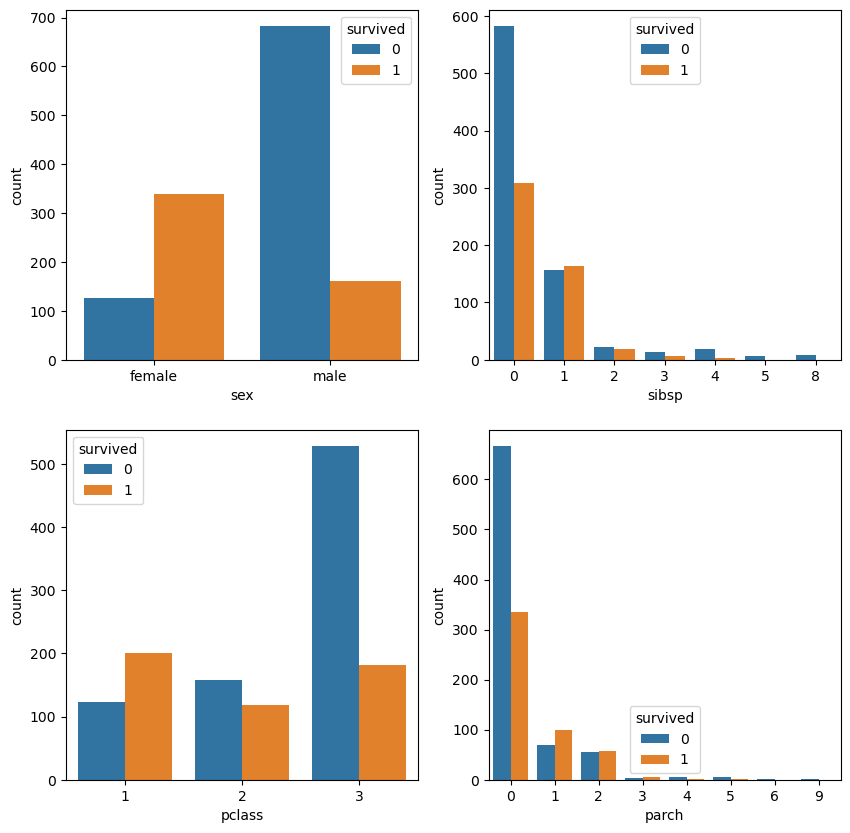

In [16]:
cat_var = ['sex','sibsp','pclass','parch']
fig, axes = plt.subplots(2,2, figsize=(10,10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue='survived', ax=ax)

## feature engineering